In [0]:
!wget https://github.com/midas-network/COVID-19/archive/master.zip
!unzip master.zip

In [0]:
import pandas as pd
import numpy as np
import os

from shapely.geometry import Point, Polygon
import descartes

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
root_path = 'COVID-19-master/data/cases/china/daily_cases_chinacdc_EN/'

recent = sorted(os.listdir(root_path))[-3]
path = os.path.join(root_path, recent)
df = pd.read_csv(path)
columns = ['Province', 'Suspeitos', 'Suspeitos Acumulados', 'Confirmados', 'Confirmados Acumulados', 'Mortes', 'Mortes Acumuladas']
df.columns= columns
print(df.shape)
display(df.head())
df.sum()

(34, 7)


,Province,Suspeitos,Suspeitos Acumulados,Confirmados,Confirmados Acumulados,Mortes,Mortes Acumuladas
0,Beijing,7,41,21,479,0,8
1,Tianjin,2,4,0,136,0,3
2,Hebei Province,0,0,0,318,0,6
3,Shanxi Province,0,0,0,133,0,0
4,Inner Mongolia Autonomous Region,0,0,0,75,0,1


Province                  BeijingTianjinHebei ProvinceShanxi ProvinceInn...
Suspeitos                                                                23
Suspeitos Acumulados                                                    105
Confirmados                                                              84
Confirmados Acumulados                                                81235
Mortes                                                                    8
Mortes Acumuladas                                                      3250
dtype: object

In [0]:
dados = {'Data': [], 'Confirmados': [], 'CA': [], 'Mortes': [], 'MA': []}
for k, csv in enumerate(sorted(os.listdir(root_path))[:-3]):
  
  path = os.path.join(root_path, csv)
  df = pd.read_csv(path)
  df = df.loc[:, ['province', 'Add Suspect', 'Cumulative Suspect', 'New diagnosis', 'Cumulative diagnosis', 'Added death', 'Cumulative death' ]] 
  df.columns = columns

  data = csv[:-4].split('-')
  dados['Data'].append(data[2][:2]+'/'+data[1]+'/'+data[0])

  dados['Confirmados'].append(df['Confirmados'].sum()) 
  dados['CA'].append(df['Confirmados Acumulados'].sum()) 
  dados['Mortes'].append(df['Mortes'].sum()) 
  dados['MA'].append(df['Mortes Acumuladas'].sum()) 

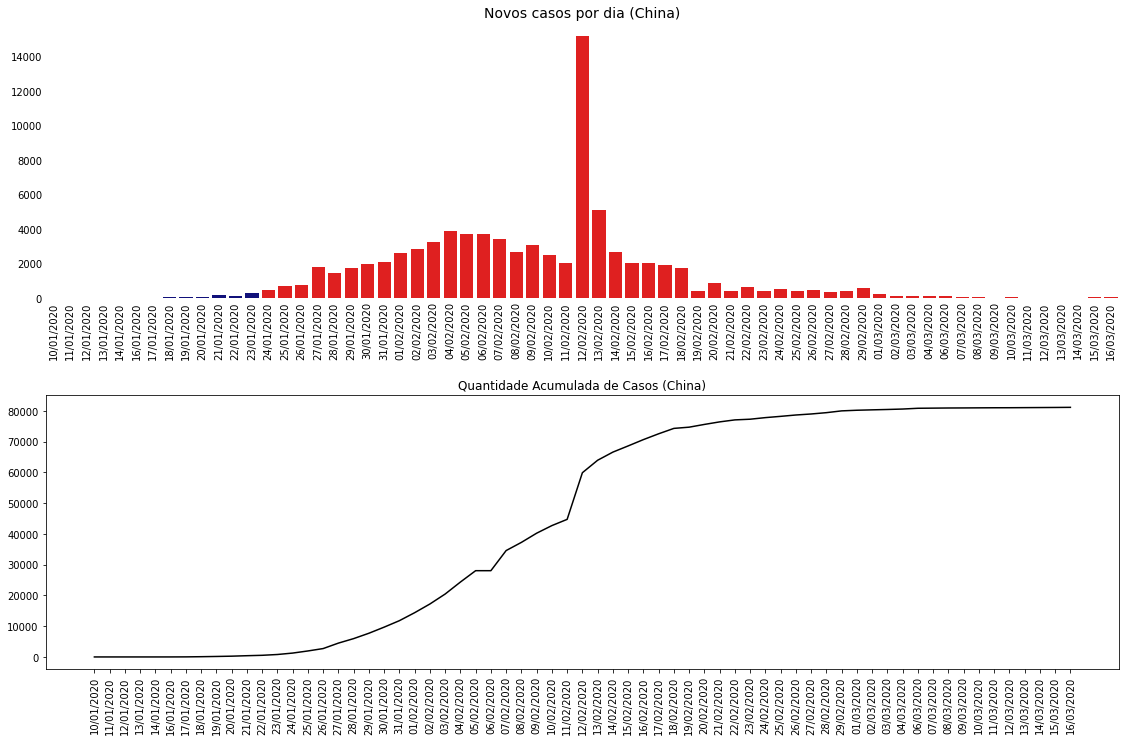

In [0]:
fig, ax = plt.subplots(2,1,figsize=(16, 10))
sns.lineplot(np.arange(len(dados['Data'])), dados['CA'], ax=ax[1], color='k', linestyle='dashed')
ax[1].set_title('Quantidade Acumulada de Casos (China)')
ax[1].set_xticks(np.arange(len(dados['Data'])))
ax[1].set_xticklabels(dados['Data'])

clrs = ['darkblue' if (x < 13) else 'red' for x in np.arange(len(dados['Data'])) ]
sns.barplot(np.arange(len(dados['Data'])), dados['Confirmados'], palette=clrs, ax=ax[0], label=None)
ax[0].set_title('Novos casos por dia (China)', fontsize=14)
ax[0].set_xticks(np.arange(len(dados['Data'])))
ax[0].set_xticklabels(dados['Data'], rotation=90)
ax[0].set_frame_on(False)
ax[0].tick_params(axis='both', which='both', length=0)

fig.tight_layout(pad=2.0)
plt.xticks(rotation=90)
plt.savefig('china-pordia.svg', format='svg', dpi=300)
plt.show()

No handles with labels found to put in legend.


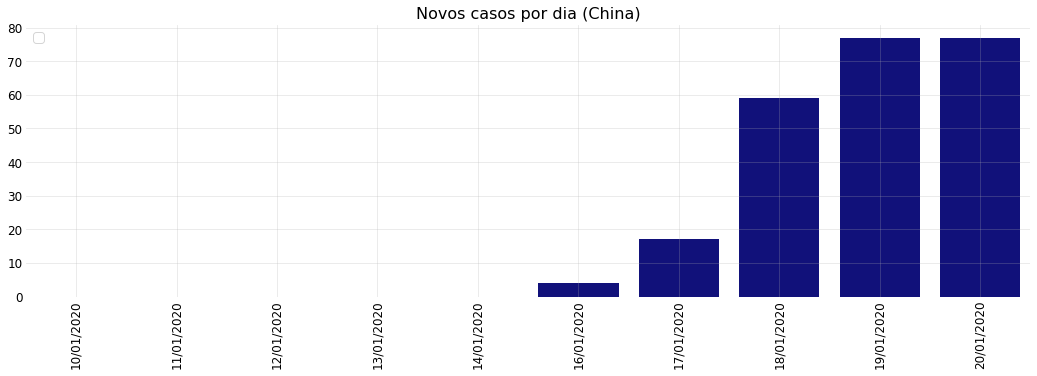

No handles with labels found to put in legend.


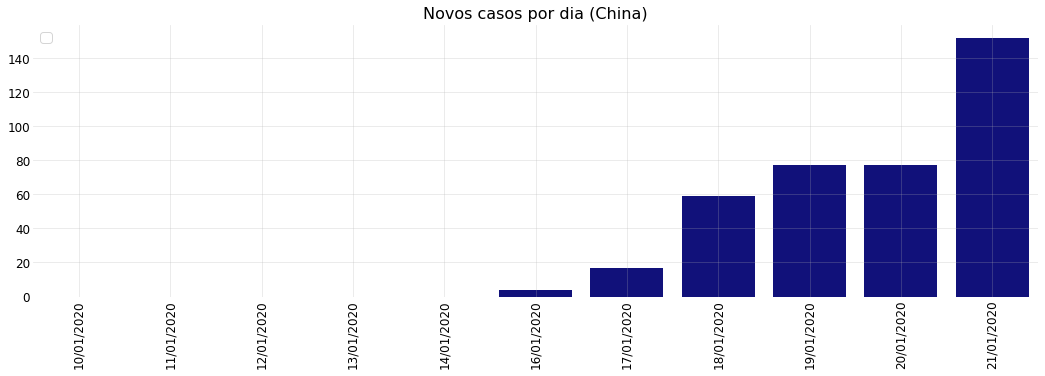

No handles with labels found to put in legend.


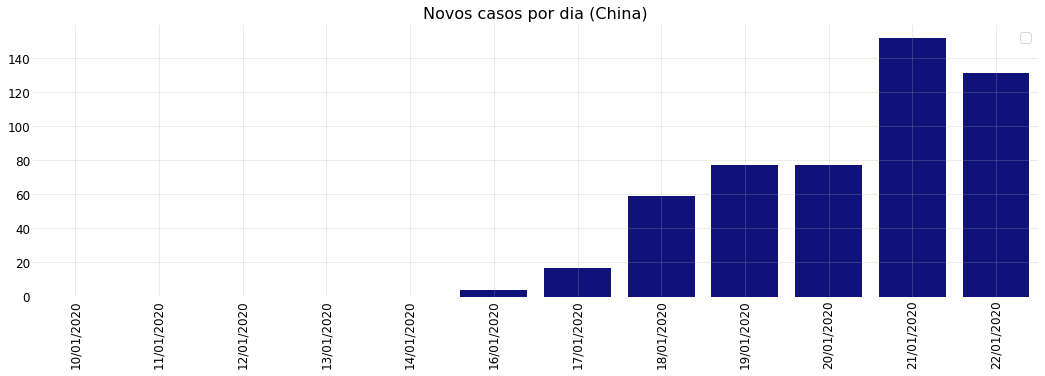

No handles with labels found to put in legend.


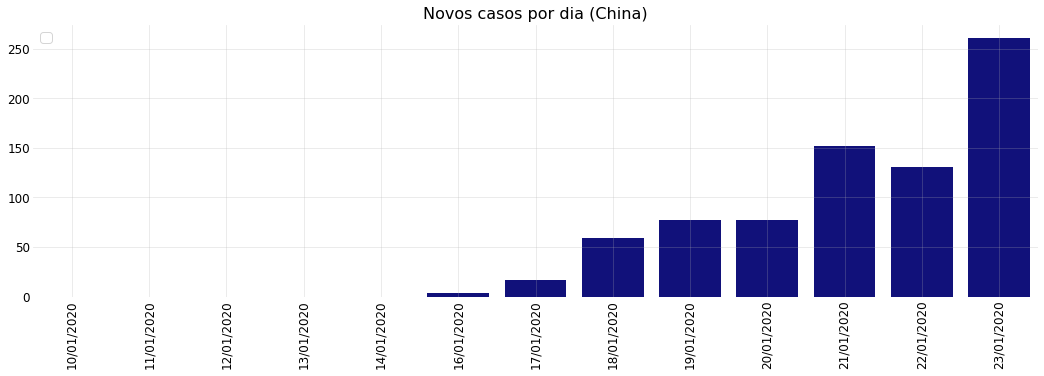

No handles with labels found to put in legend.


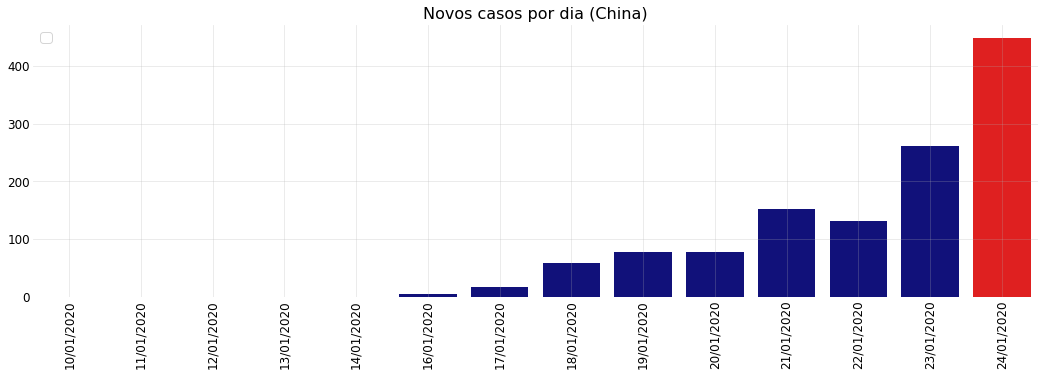

No handles with labels found to put in legend.


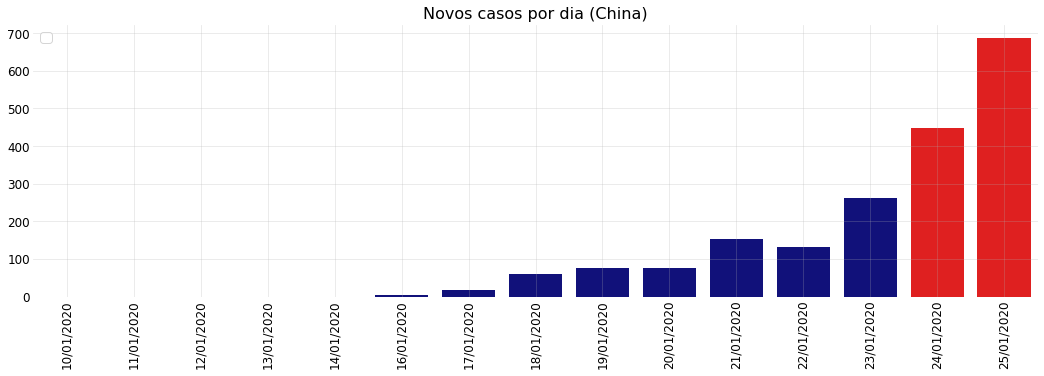

No handles with labels found to put in legend.


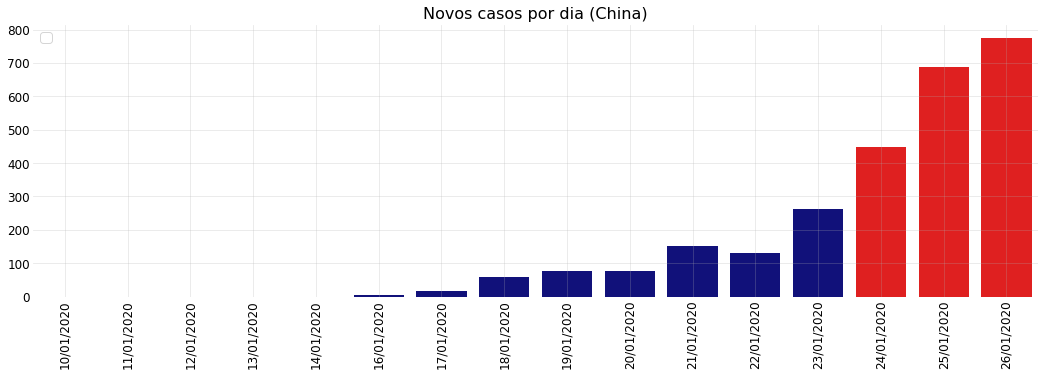

No handles with labels found to put in legend.


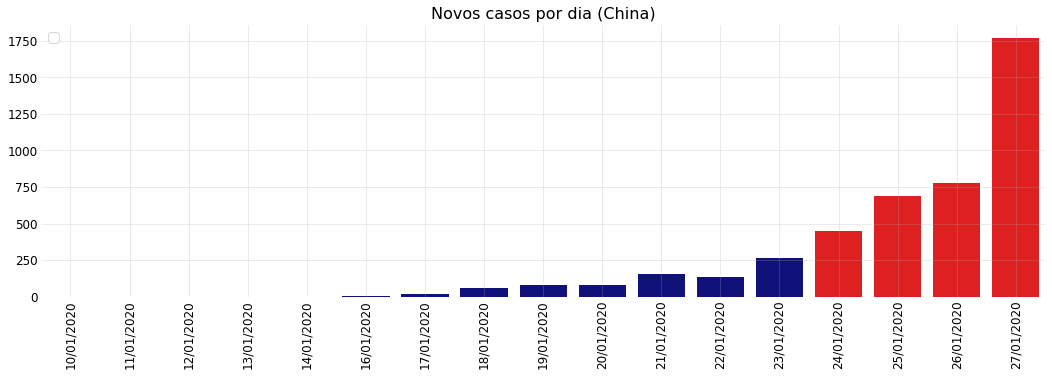

No handles with labels found to put in legend.


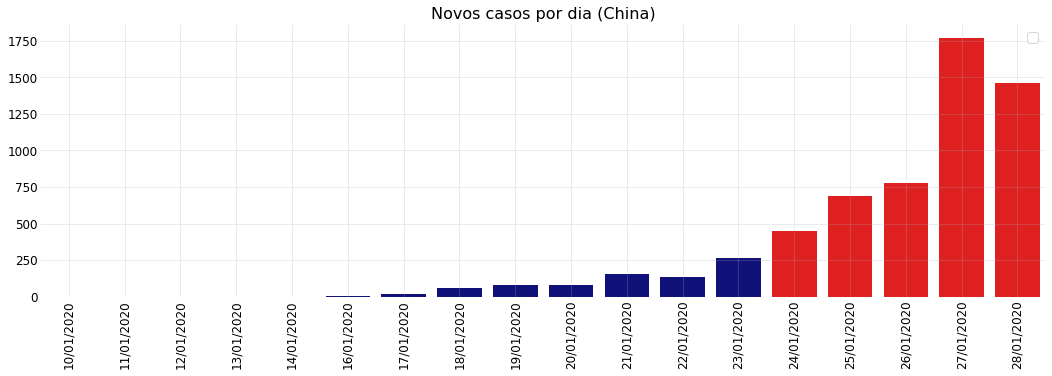

No handles with labels found to put in legend.


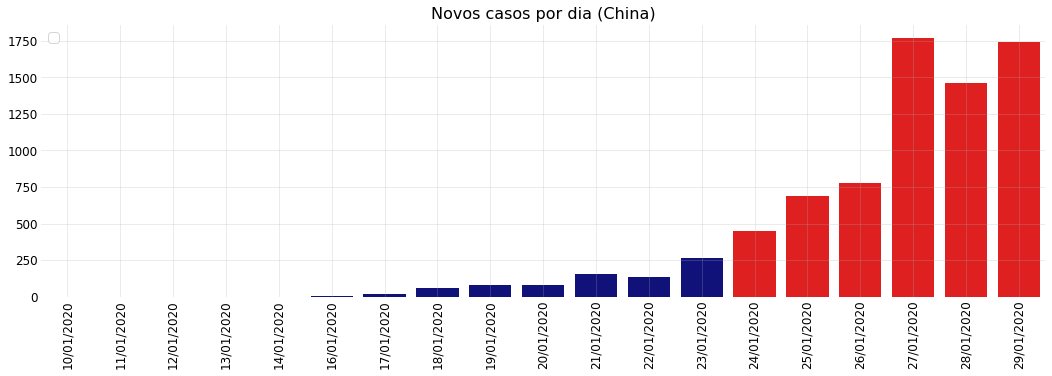

No handles with labels found to put in legend.


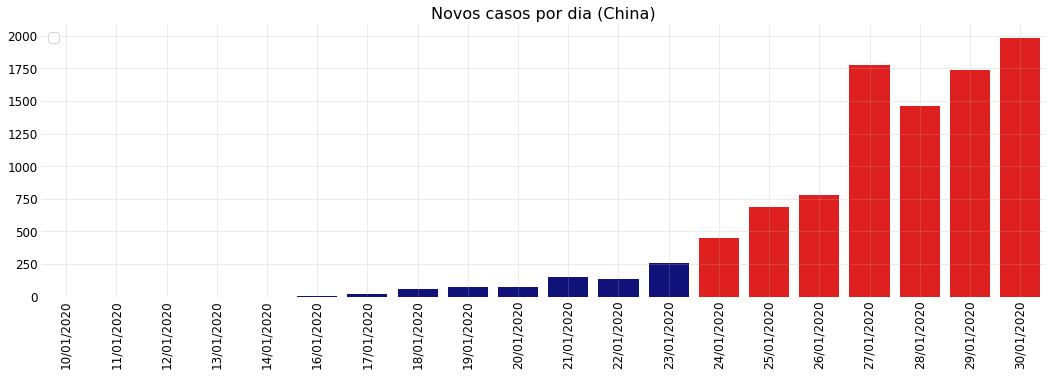

No handles with labels found to put in legend.


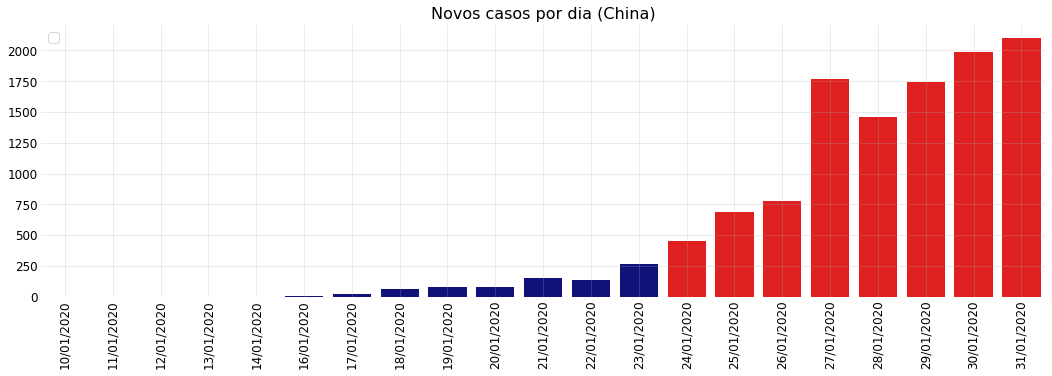

No handles with labels found to put in legend.


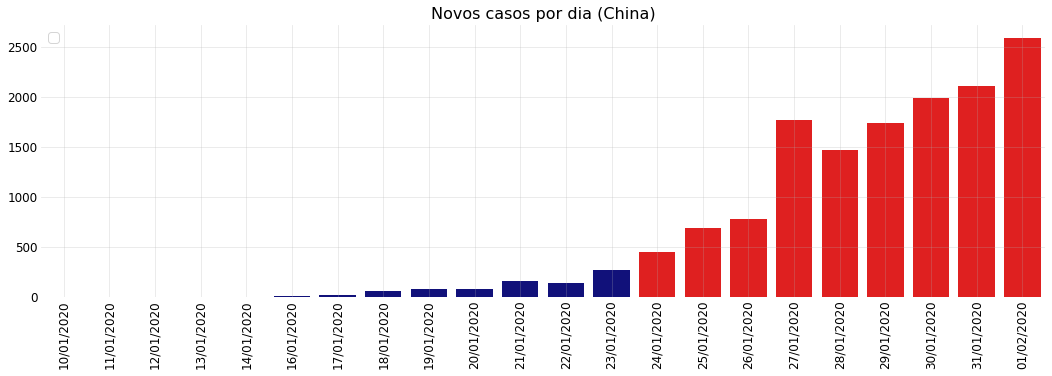

No handles with labels found to put in legend.


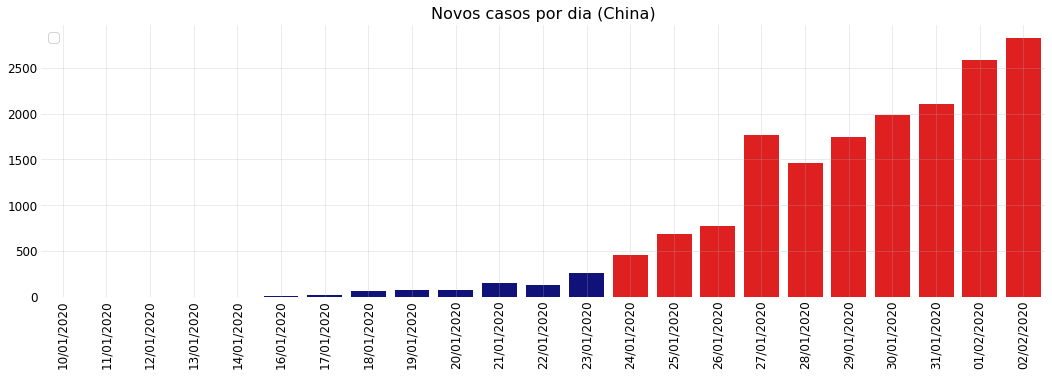

No handles with labels found to put in legend.


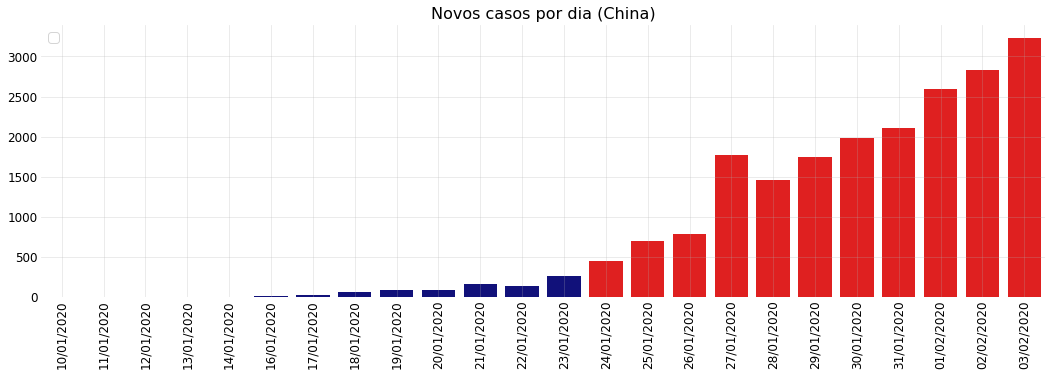

No handles with labels found to put in legend.


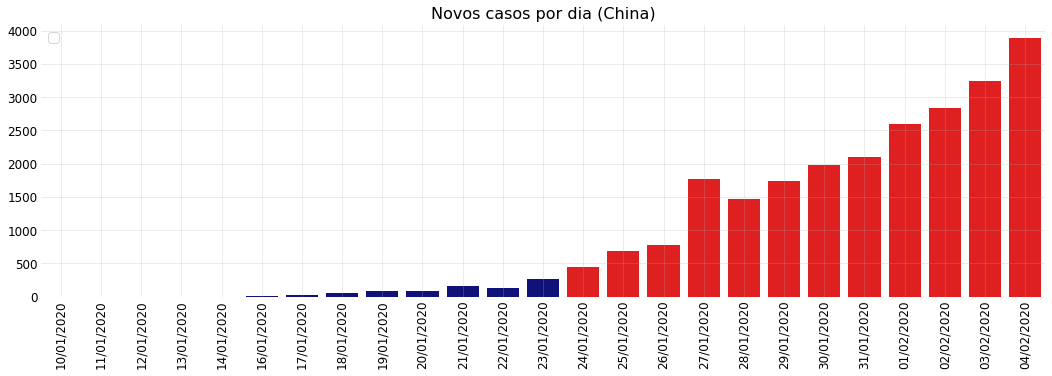

No handles with labels found to put in legend.


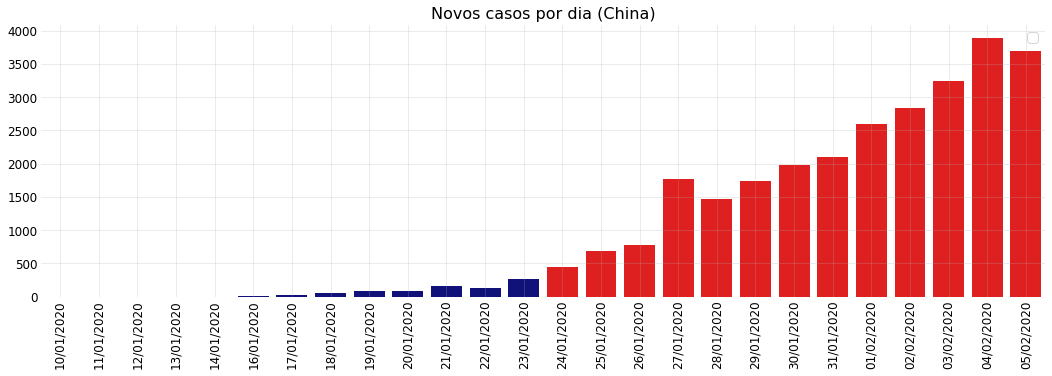

No handles with labels found to put in legend.


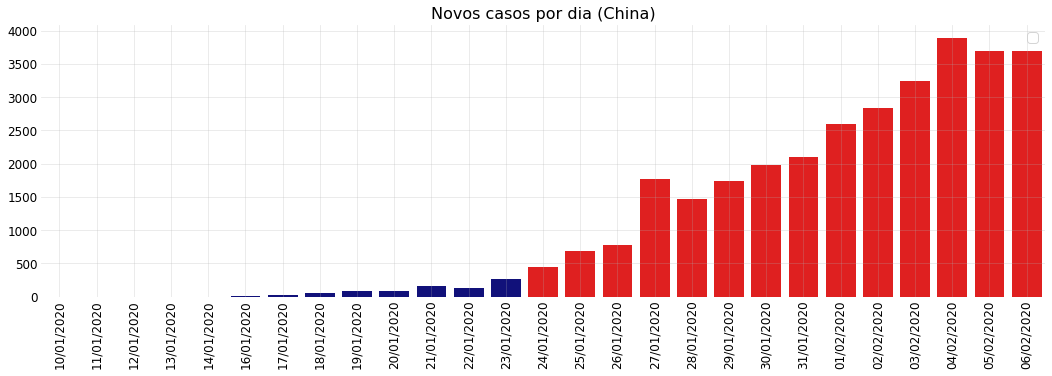

No handles with labels found to put in legend.


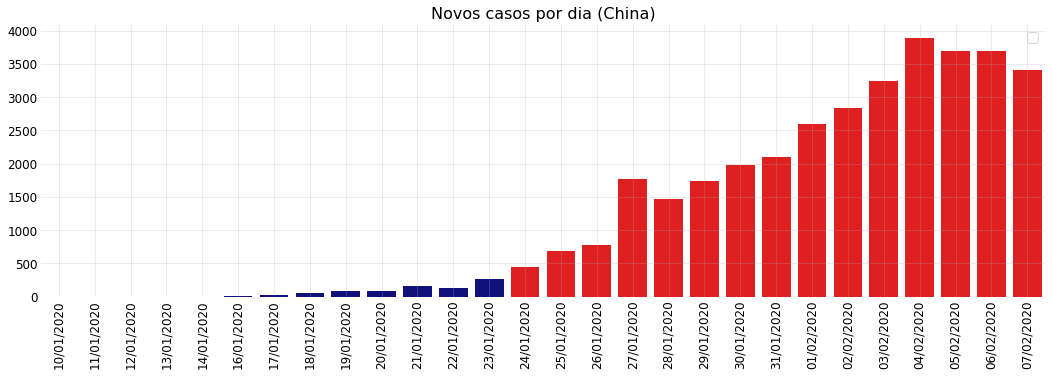

No handles with labels found to put in legend.


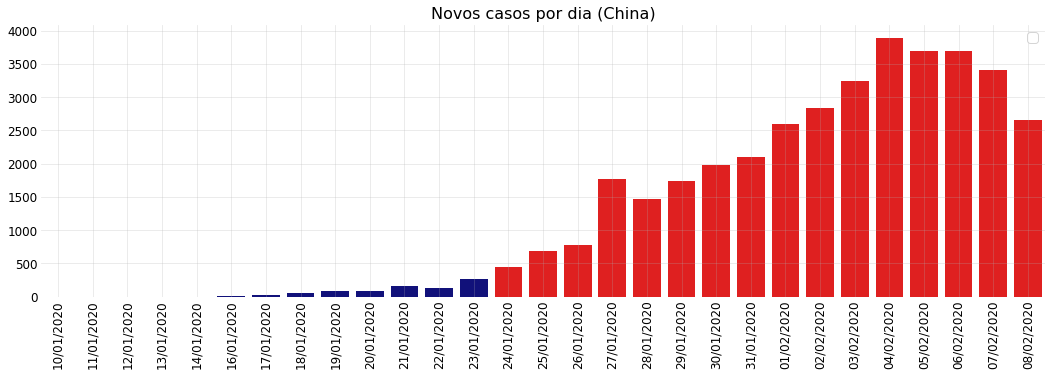

No handles with labels found to put in legend.


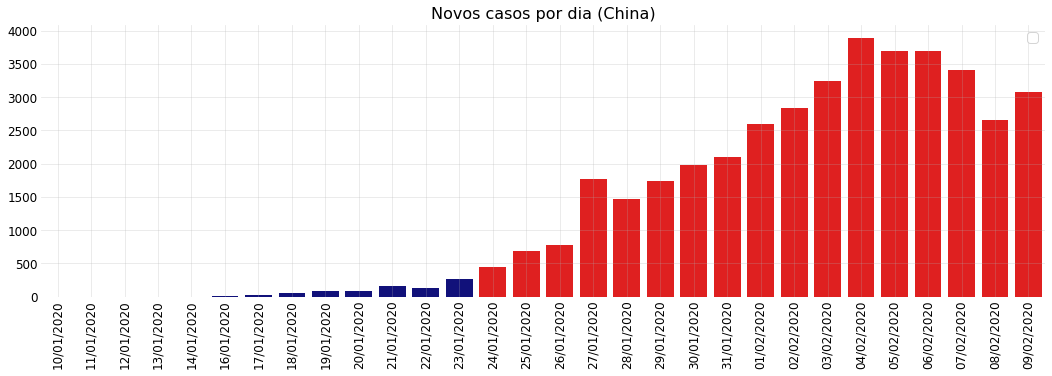

No handles with labels found to put in legend.


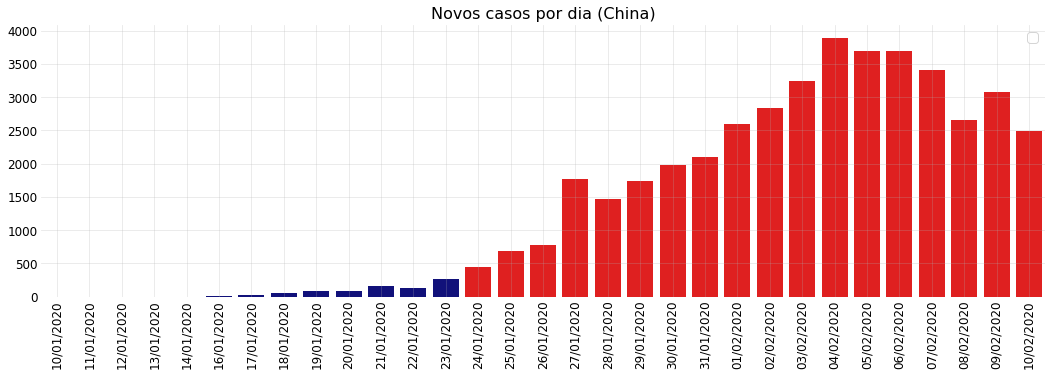

No handles with labels found to put in legend.


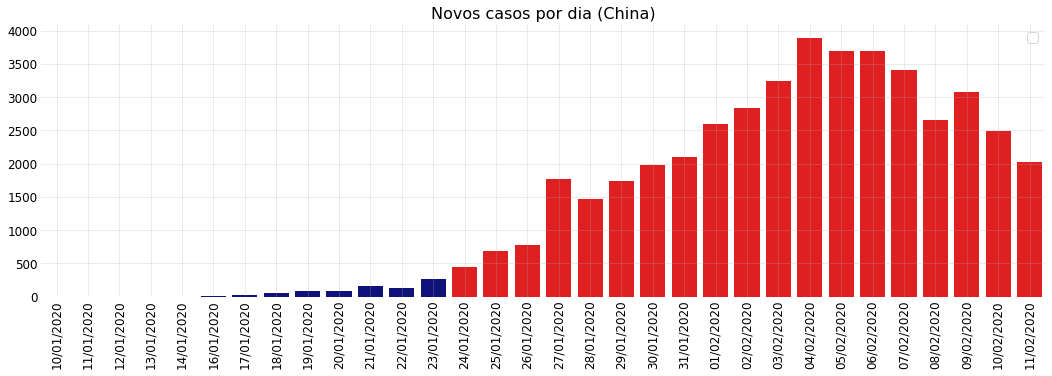

No handles with labels found to put in legend.


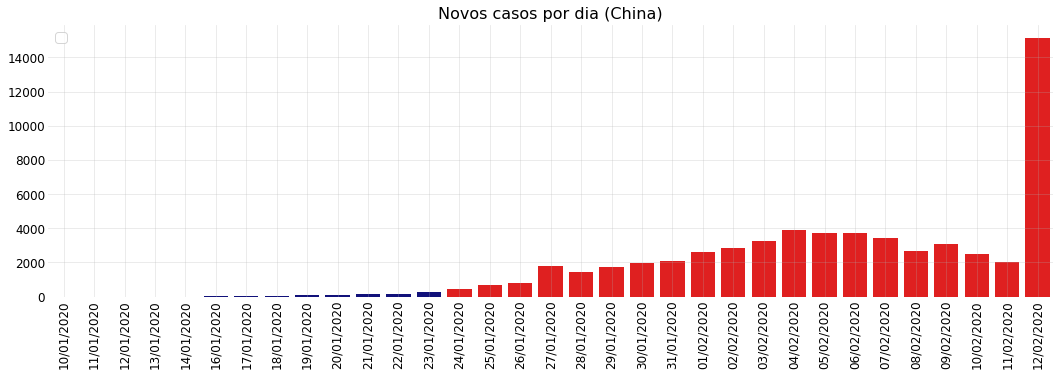

No handles with labels found to put in legend.


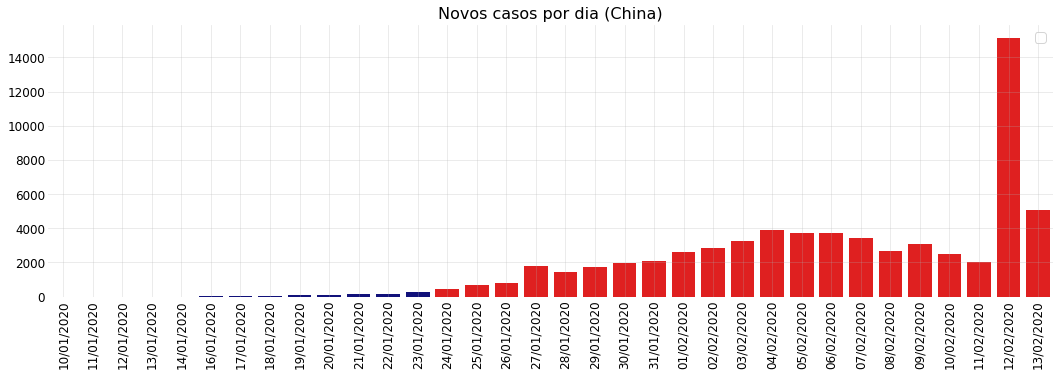

No handles with labels found to put in legend.


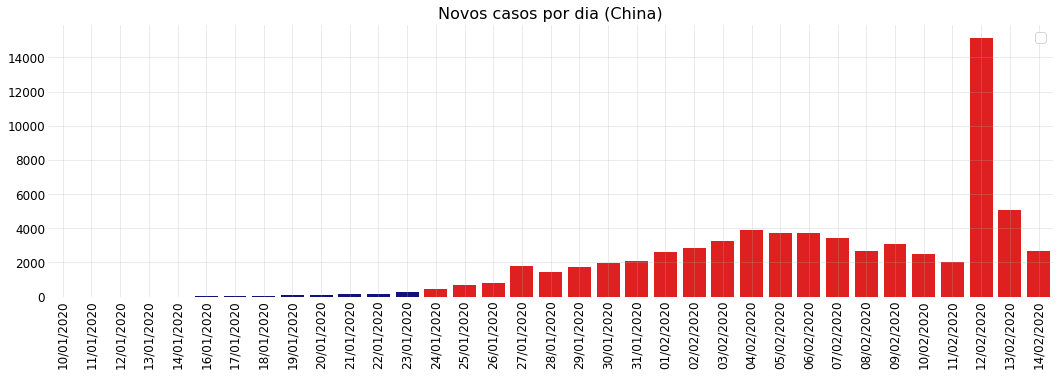

No handles with labels found to put in legend.


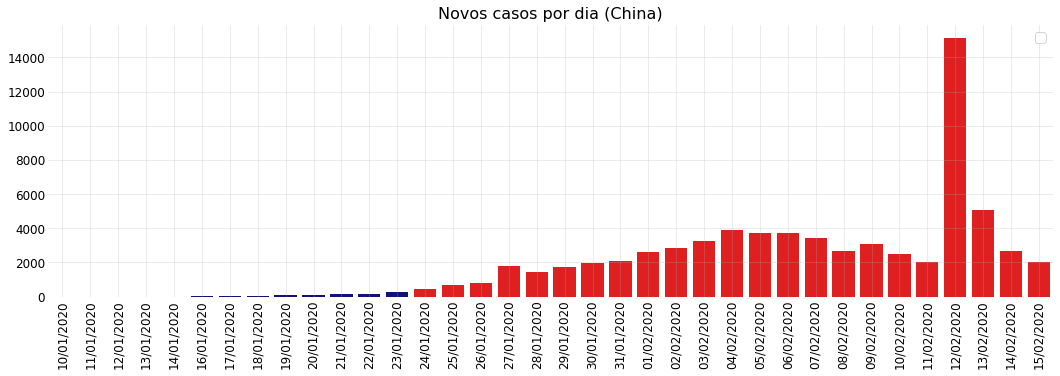

No handles with labels found to put in legend.


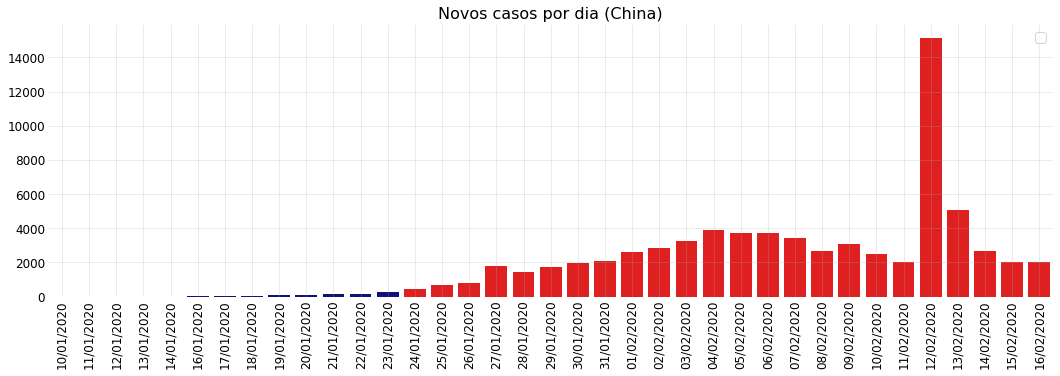

No handles with labels found to put in legend.


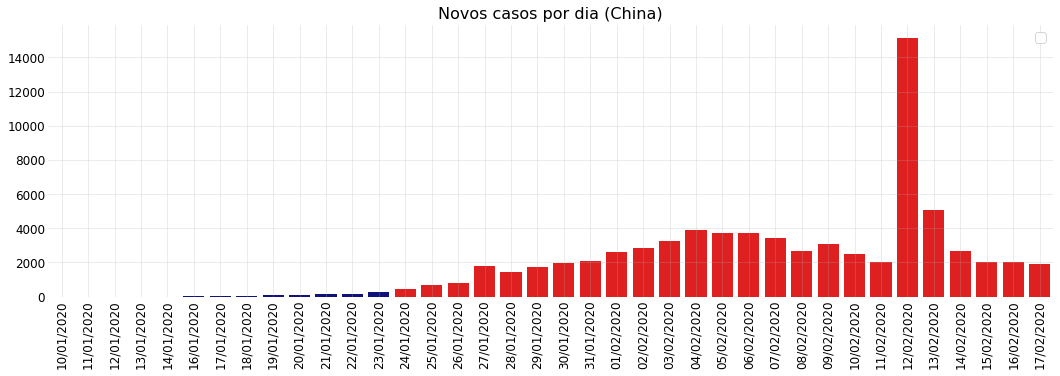

No handles with labels found to put in legend.


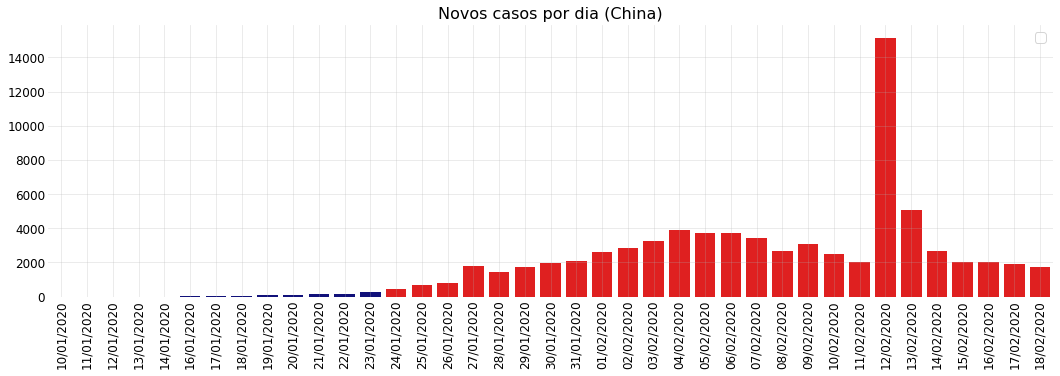

No handles with labels found to put in legend.


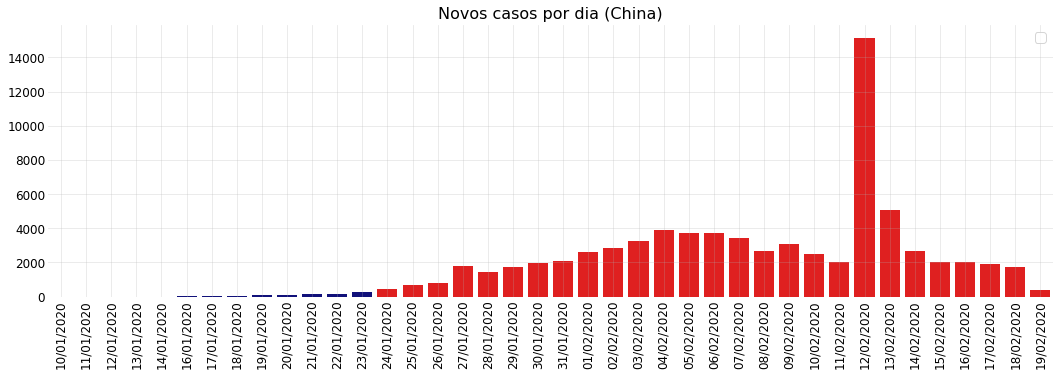

No handles with labels found to put in legend.


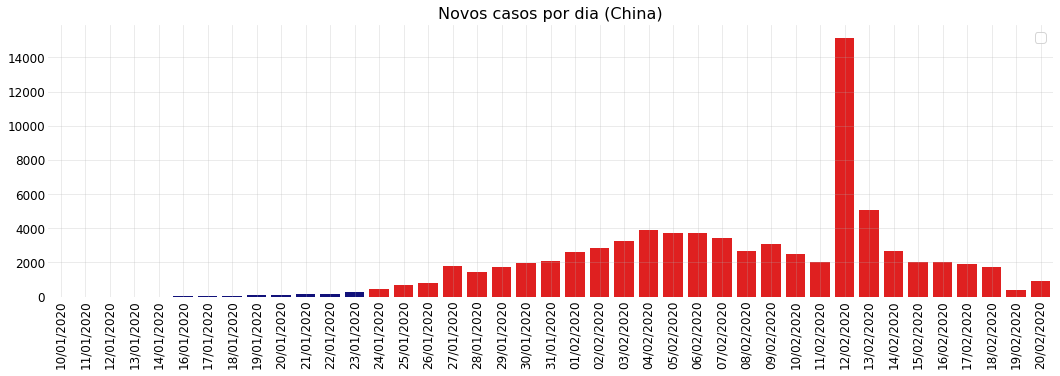

No handles with labels found to put in legend.


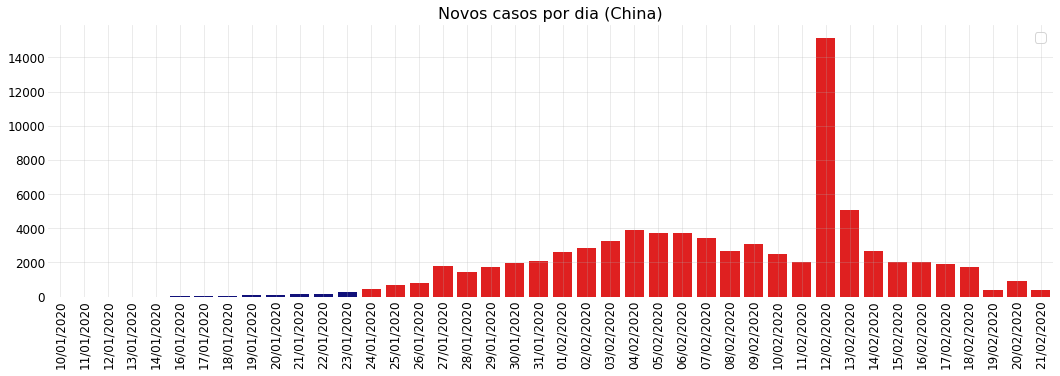

No handles with labels found to put in legend.


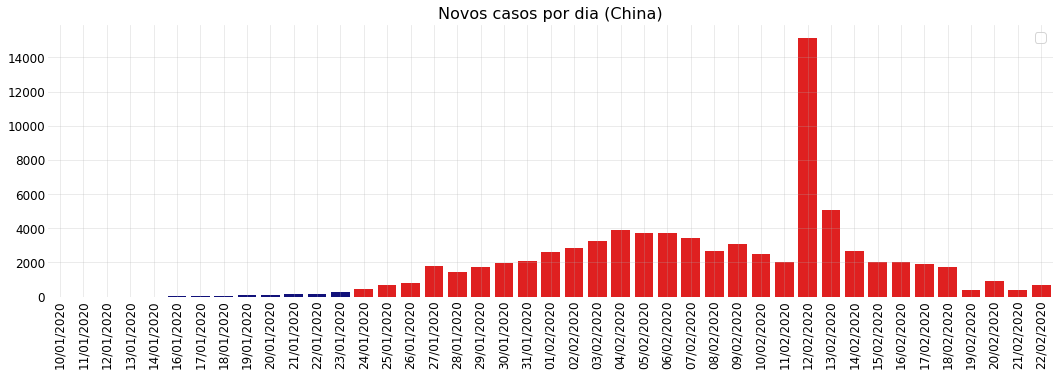

No handles with labels found to put in legend.


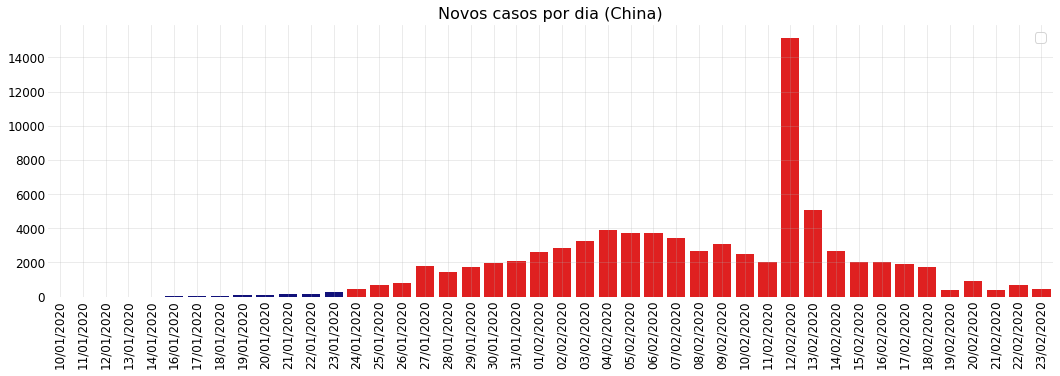

No handles with labels found to put in legend.


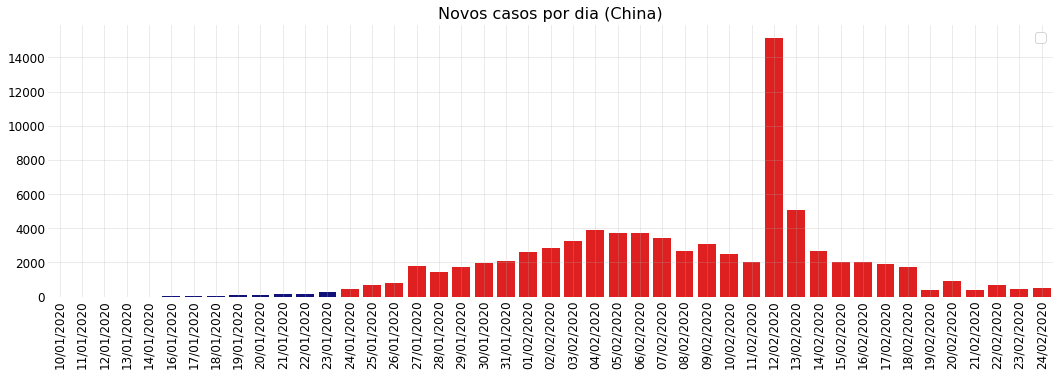

No handles with labels found to put in legend.


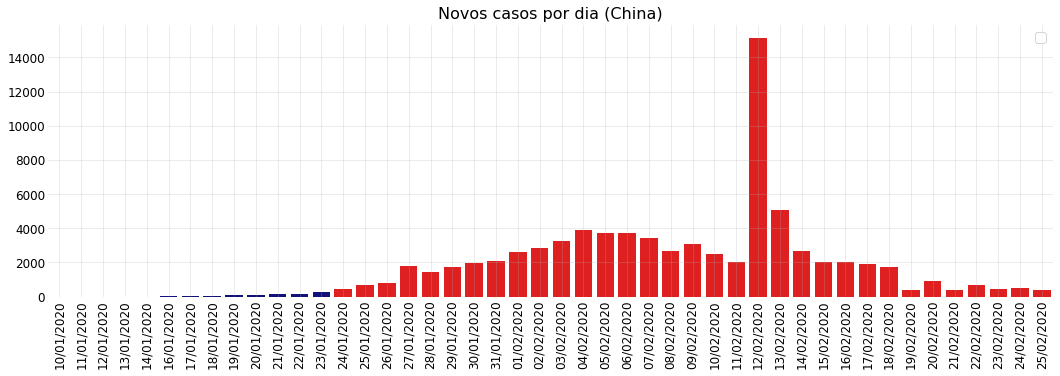

No handles with labels found to put in legend.


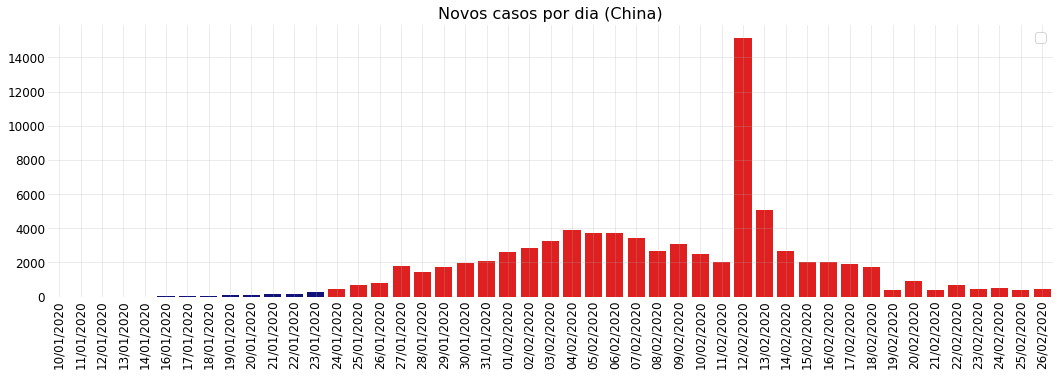

No handles with labels found to put in legend.


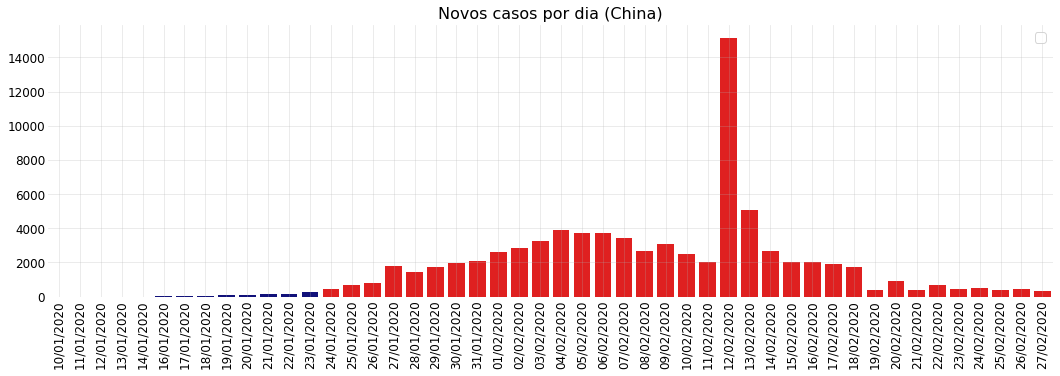

No handles with labels found to put in legend.


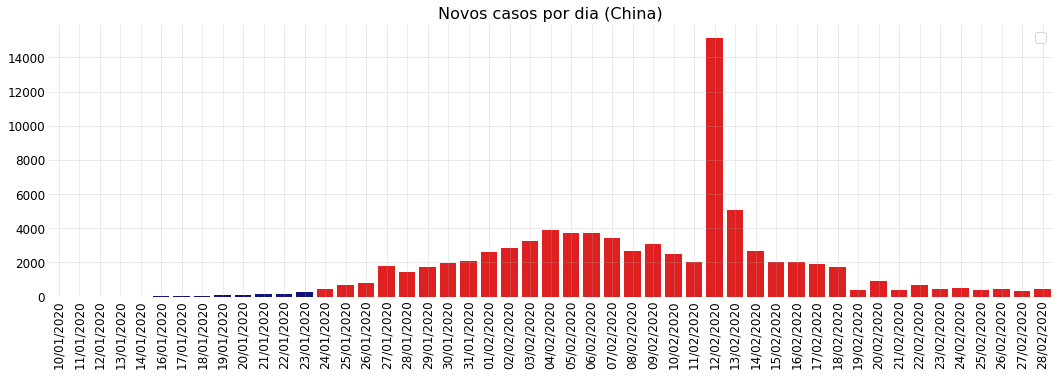

No handles with labels found to put in legend.


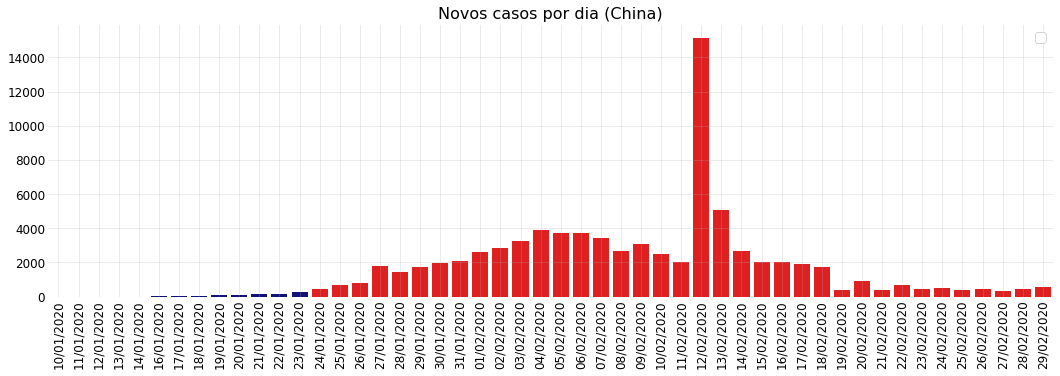

No handles with labels found to put in legend.


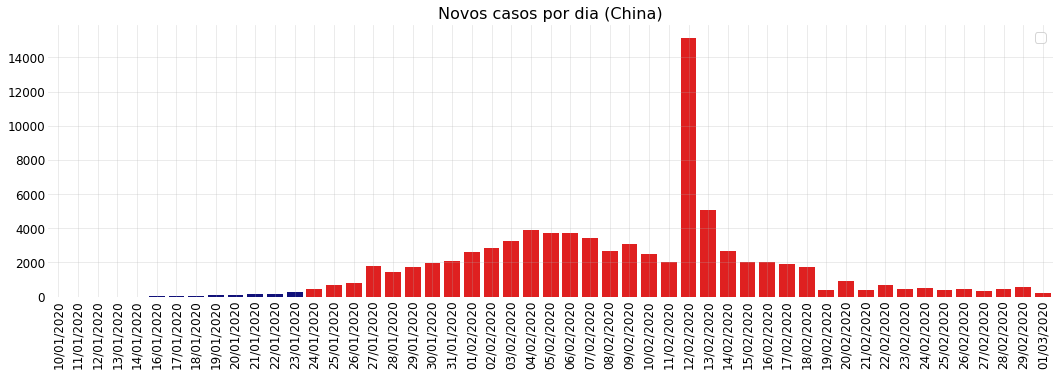

No handles with labels found to put in legend.


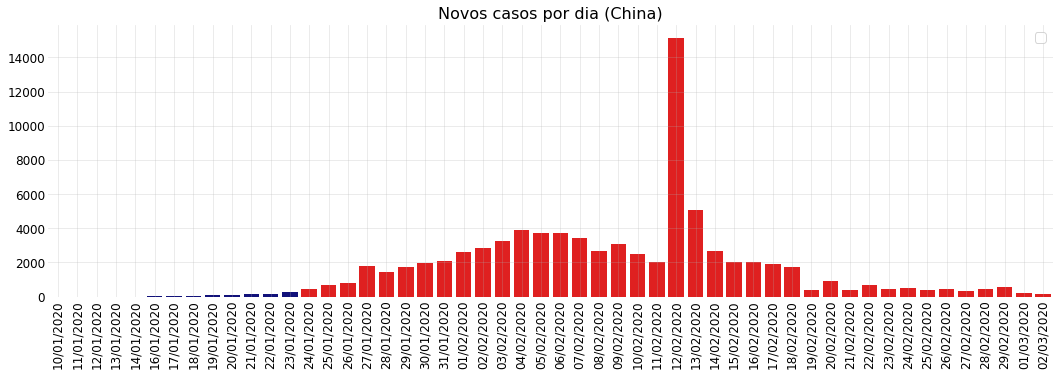

No handles with labels found to put in legend.


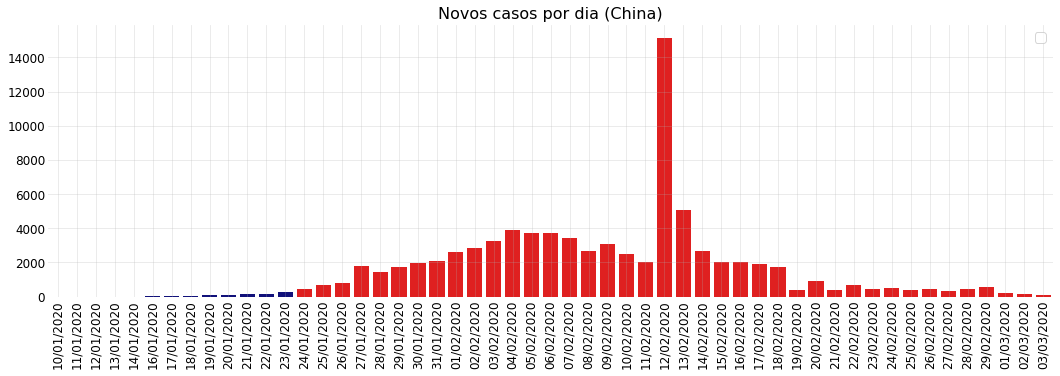

No handles with labels found to put in legend.


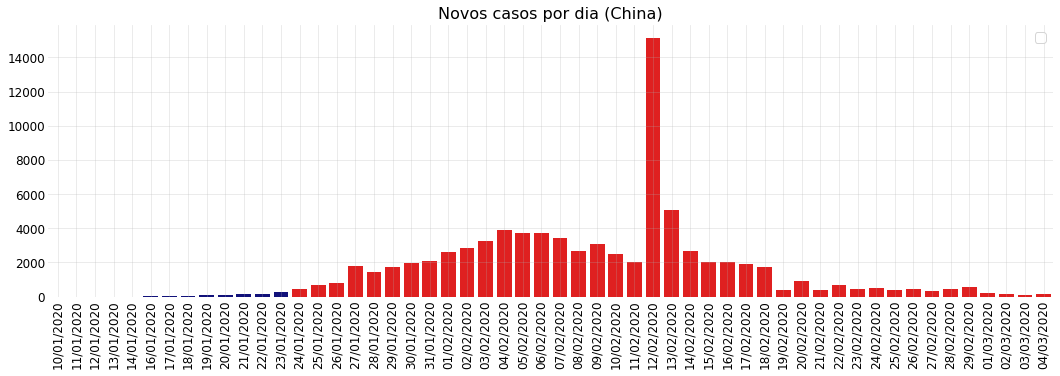

No handles with labels found to put in legend.


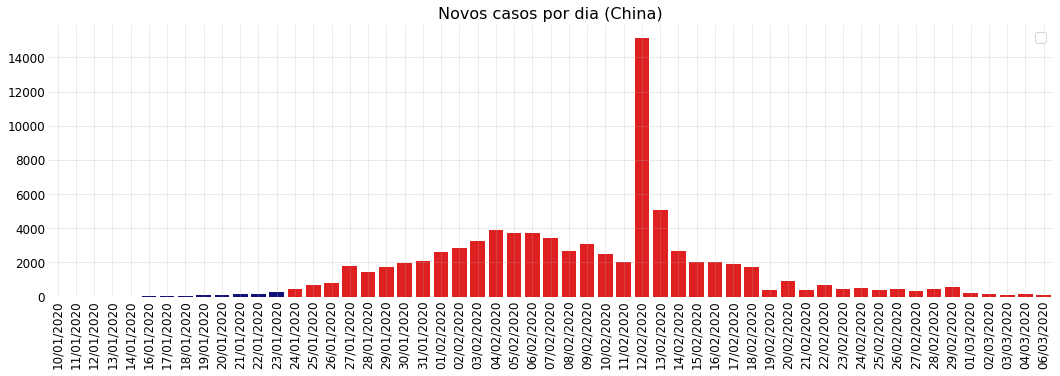

No handles with labels found to put in legend.


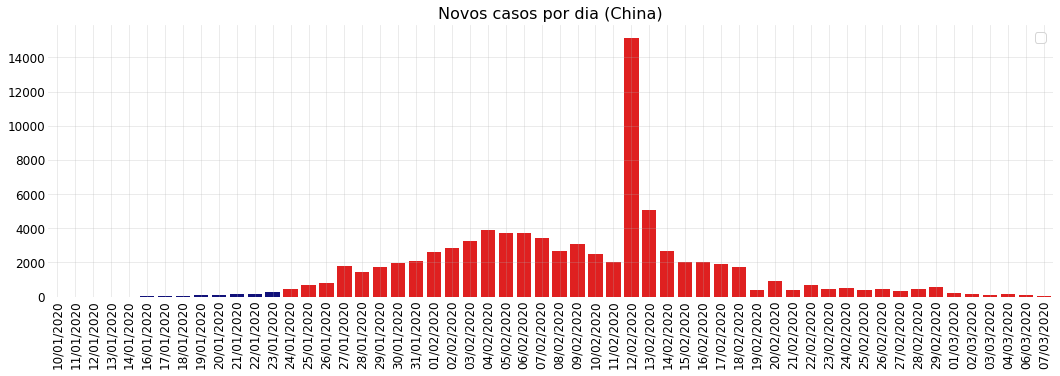

No handles with labels found to put in legend.


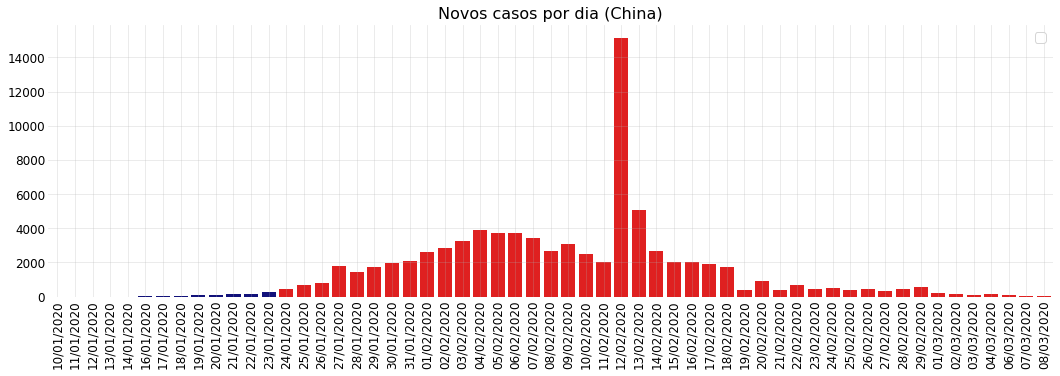

No handles with labels found to put in legend.


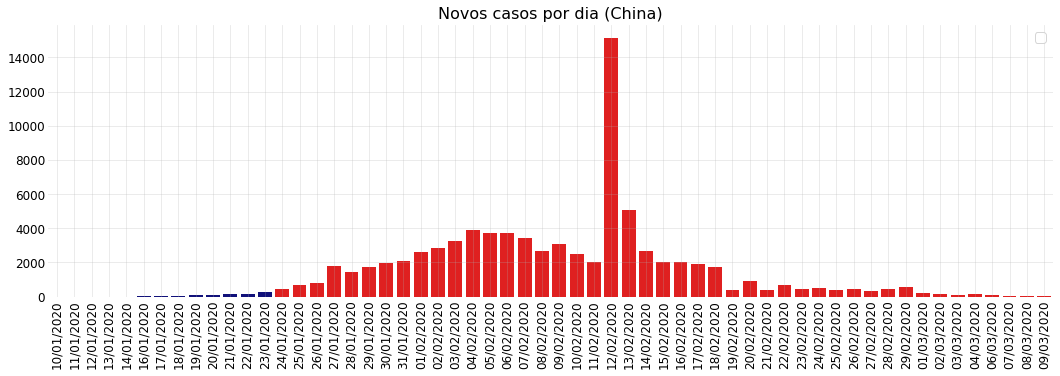

No handles with labels found to put in legend.


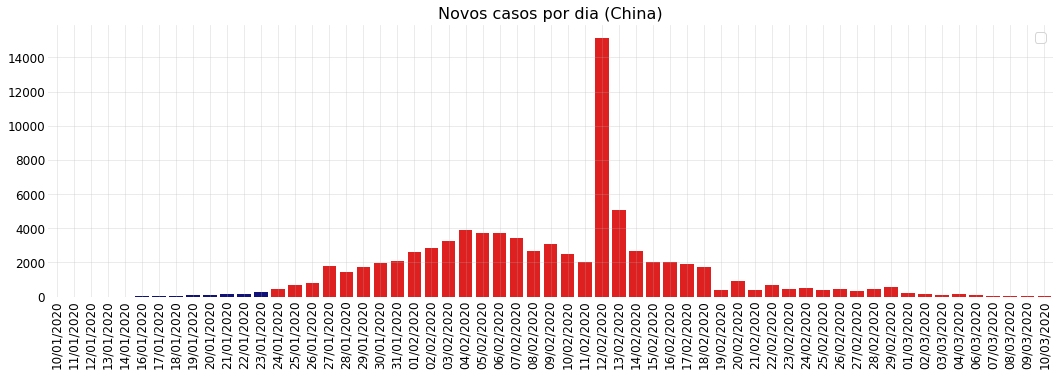

No handles with labels found to put in legend.


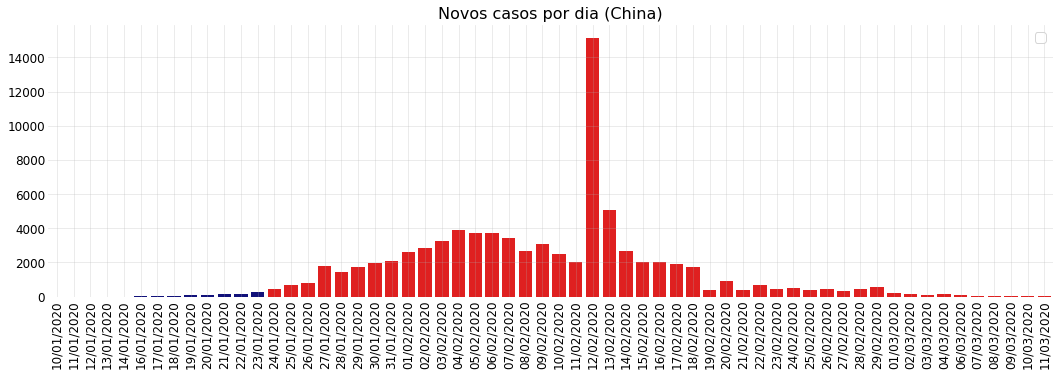

No handles with labels found to put in legend.


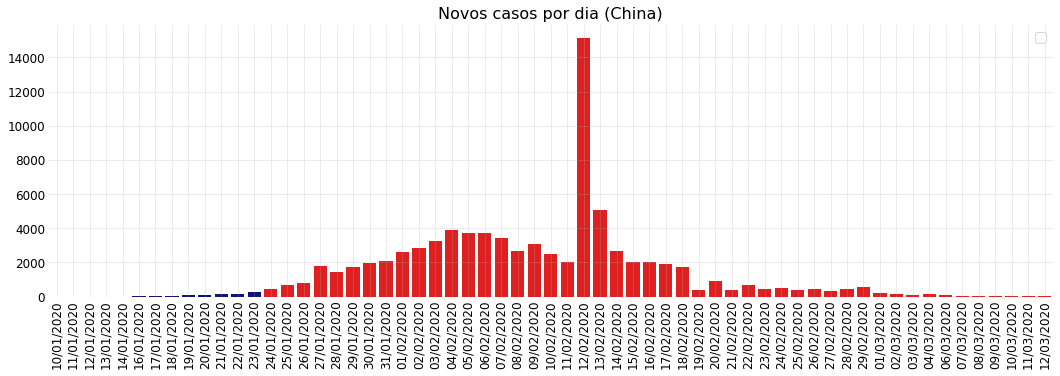

No handles with labels found to put in legend.


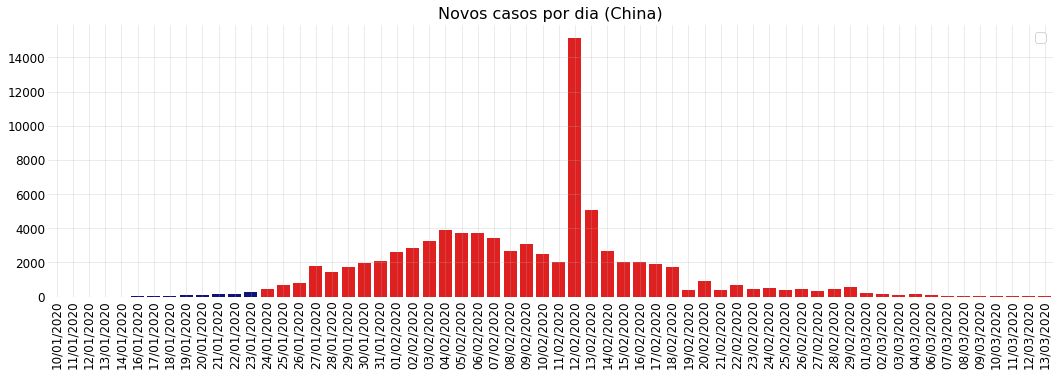

No handles with labels found to put in legend.


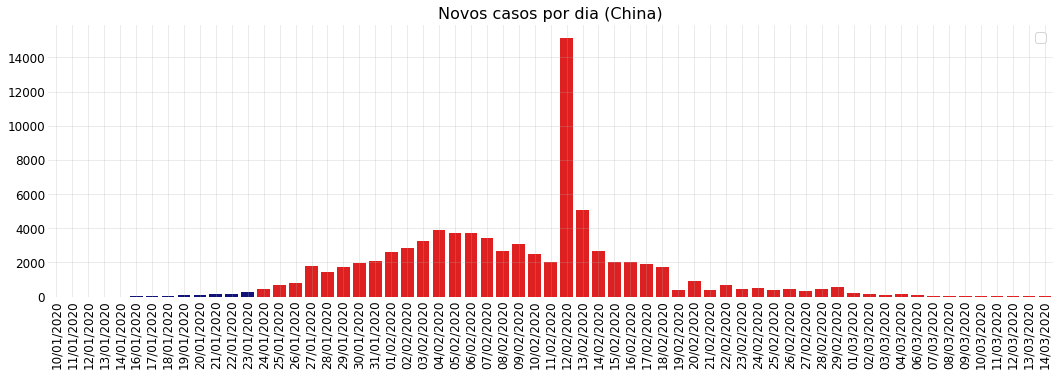

No handles with labels found to put in legend.


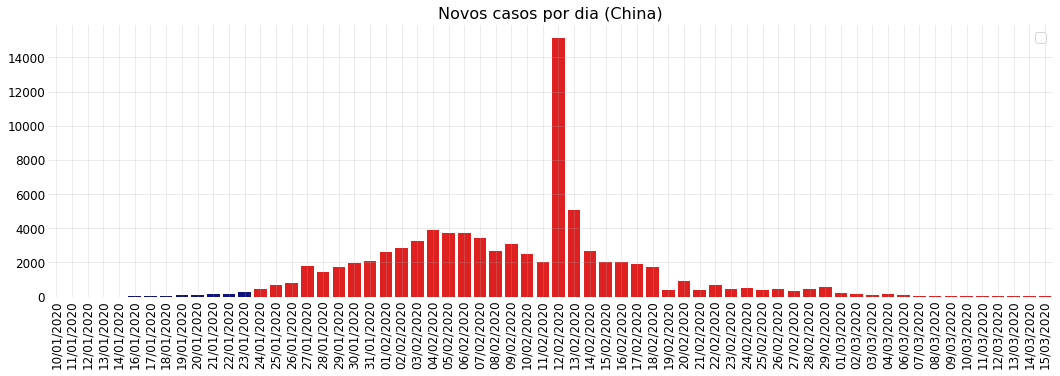

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# os.mkdir('imgs/')

for i in range(10,len(dados['CA'])):
  fig, ax = plt.subplots(figsize=(18, 5))
  # sns.lineplot(np.arange(len(dados['Data']))[:i], dados['CA'][:i], ax=ax, color='k', linestyle='dashed', label="Valores acumulados")

  clrs = ['darkblue' if (x < 13) else 'red' for x in np.arange(len(dados['Data'])) ]
  sns.barplot(np.arange(len(dados['Data']))[:i], dados['Confirmados'][:i], palette=clrs, ax=ax, label=None)

  plt.xticks(np.arange(len(dados['Data']))[:i], dados['Data'][:i], rotation=90, fontsize=12)
  plt.yticks(fontsize=12)
  plt.title('Novos casos por dia (China)', fontsize=16)
  ax.set_frame_on(False)
  ax.tick_params(axis='both', which='both', length=0)
  plt.grid(True, alpha=0.3)

  plt.legend(fontsize=14)
  plt.savefig('imgs/'+str(i)+'.png', dpi=100, format='png', bbox_inches='tight')
  plt.show()
  plt.close('all')

In [0]:
!zip -r imgs.zip imgs/

updating: imgs/ (stored 0%)
  adding: imgs/48.png (deflated 22%)
  adding: imgs/22.png (deflated 27%)
  adding: imgs/15.png (deflated 28%)
  adding: imgs/33.png (deflated 25%)
  adding: imgs/46.png (deflated 25%)
  adding: imgs/55.png (deflated 25%)
  adding: imgs/17.png (deflated 27%)
  adding: imgs/52.png (deflated 22%)
  adding: imgs/35.png (deflated 24%)
  adding: imgs/12.png (deflated 27%)
  adding: imgs/43.png (deflated 28%)
  adding: imgs/54.png (deflated 23%)
  adding: imgs/21.png (deflated 25%)
  adding: imgs/34.png (deflated 23%)
  adding: imgs/60.png (deflated 23%)
  adding: imgs/47.png (deflated 24%)
  adding: imgs/13.png (deflated 26%)
  adding: imgs/23.png (deflated 25%)
  adding: imgs/11.png (deflated 26%)
  adding: imgs/32.png (deflated 24%)
  adding: imgs/25.png (deflated 22%)
  adding: imgs/10.png (deflated 26%)
  adding: imgs/24.png (deflated 24%)
  adding: imgs/50.png (deflated 22%)
  adding: imgs/38.png (deflated 24%)
  adding: imgs/56.png (deflated 22%)
  adding: 

In [0]:
import imageio

images = []
for filename in sorted(os.listdir('imgs')):
  file_path = os.path.join('imgs', filename)
  images.append(imageio.imread(file_path))

imageio.mimsave('data-covid19-china.gif', images, duration=1/2)